In [ ]:
#Future Prediction : ARIMA / ARMA model

In [1]:
#dataset timeseries.csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#To laod Dataset 
df=pd.read_csv("timeseries.csv")
#To show first 5 records
df.head()

Date     Value
0  01-07-1991  3.526591
1  01-08-1991  3.180891
2  01-09-1991  3.252221
3  01-10-1991  3.611003
4  01-11-1991  3.565869

In [3]:
#How many rows and columns in given dataset
df.shape

(204, 2)

In [4]:
#To check null values
df.isnull().sum()

Date     0
Value    0
dtype: int64

In [5]:
#Cross check 
#To check datatypes of each column
df.dtypes

Date      object
Value    float64
dtype: object

In [6]:
#To converts datatype of object column to Date Datatype
df['Date']=pd.to_datetime(df['Date'])
#To check Datatype of each column
df.dtypes

Date     datetime64[ns]
Value           float64
dtype: object

In [8]:
df['Date'].min(),df['Date'].max()

(Timestamp('1991-01-07 00:00:00'), Timestamp('2008-01-06 00:00:00'))

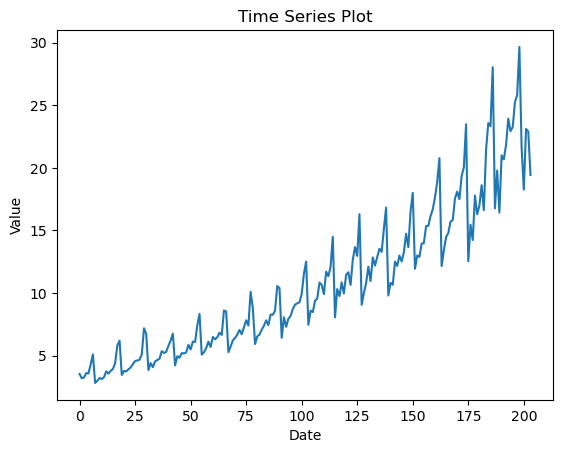

In [10]:
#plot the time series data (check given time series data is stationary
#or non-stationary )
plt.plot(df['Value'])
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Time Series Plot')
plt.show()

In [ ]:
#to see thar , it has trend as well as it has seasonality
'''Now it has trend that means it does not have a constant mean and it has 
seasonality so there are 2 factors which has    this data is non-stationary.
so if this data is non-stationary we need to do something about it and 
what will need to do we need to perform differencing '''
#AR (p) I(d)  MA(q)  
#ARIMA(p,d,q)

In [11]:
#Given Time series is non-stationary, so we need to perform Differencing 
#to make non-stationary data into stationary data 
#Apply first order differencing
df_diff=df['Value']-df['Value'].shift(1)
df_diff

0           NaN
1     -0.345700
2      0.071330
3      0.358782
4     -0.045134
         ...   
199   -8.011071
200   -3.389340
201    4.842732
202   -0.195167
203   -3.480770
Name: Value, Length: 204, dtype: float64

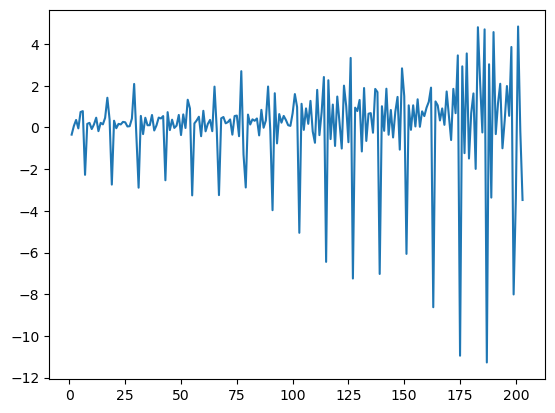

In [12]:
plt.plot(df_diff.dropna())
plt.show()

In [ ]:
#in this above plot ,the trend component removed 
#but stil seasonality means stil the TS data is non-stationary .
#we are removing seasonality component , then we need perform diffrencing
#basis of seasonality . here we have dataset , season=12 month means 
#1 season=12 month 
#perform Seasonal difference means subtract original time series data from
#lag12 means shift(12)

In [14]:
df_season_diff=df['Value']-df['Value'].shift(12)
df_season_diff.head(20)

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
5          NaN
6          NaN
7          NaN
8          NaN
9          NaN
10         NaN
11         NaN
12    0.211260
13    0.377885
14    0.524981
15    0.313487
16    0.820662
17    1.504178
18    1.103733
19    0.636337
Name: Value, dtype: float64

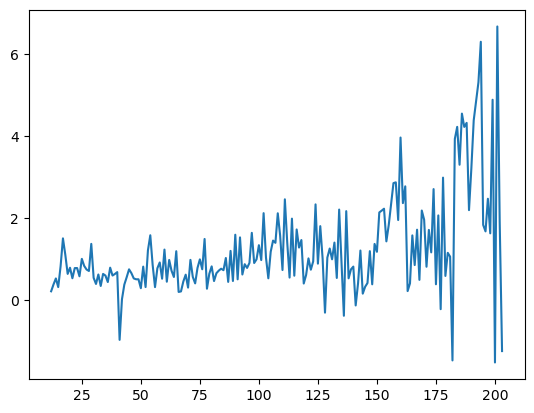

In [15]:
plt.plot(df_season_diff.dropna())
plt.show()

In [16]:
#in above plot , the seasonality component removed . 
#There are some up & downs 
#these are not seasonality , but these are just random error or white noise .
#here Seasonality has been removed but not satisfied still show some trend
#apply first order differencing  , means subtract df_season_diff from
#lag1 of itself Time series df_season_diff
df_new=df_season_diff-df_season_diff.shift(1)
df_new.head()

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: Value, dtype: float64

In [18]:
df_new.isnull().sum()

13

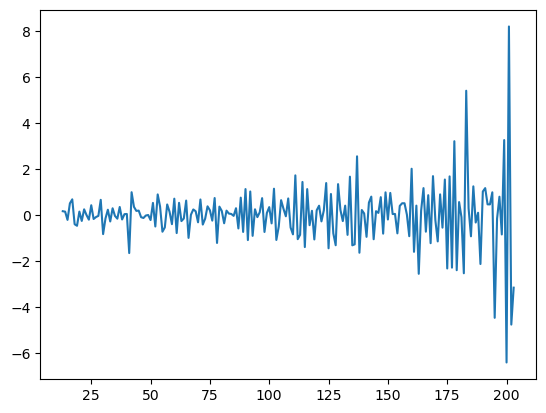

In [17]:
#plot new time series data
plt.plot(df_new.dropna())
plt.show()

In [ ]:
#Now its look much better and much stable we can see there is a constant
#mean . Here the trend has been removed and seasonality has been removed .
#There are some white noise means random error show. but this 
#look much better.
#This is the concept of differencing which is the middle of ARIMA that is
#Integration

In [ ]:
#d=1 
#Identification of AR(p) , I(d) and MA(q)order 

In [19]:
#decided the value of p : with the help of PACF curve
#decided the value of q : with the help of ACF curve

#Create ACF curve (value of q)
#use inbuilt class plot_acf 

from statsmodels.graphics.tsaplots import plot_acf

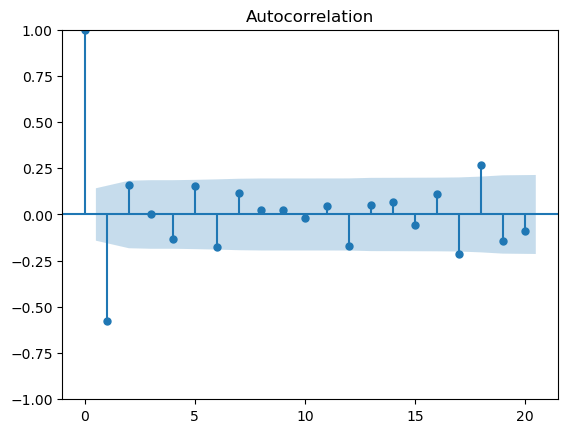

In [20]:
#Draw a ACF (Auto correlation functon) for MA(qth)order
plot_acf(df_new.dropna(),lags=20)
plt.show()

In [ ]:
#MA(q) here q=1 

In [21]:
#Create PACF curve (value of p)
#use inbuilt class plot_pacf 

from statsmodels.graphics.tsaplots import plot_pacf

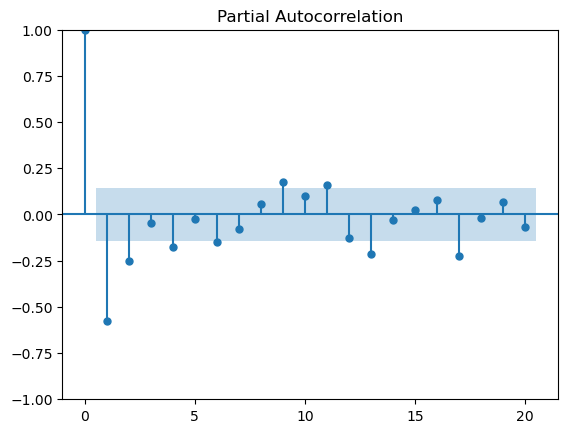

In [22]:
#Draw a PACF (Partial Auto correlation functon) for AR(pth)order
plot_pacf(df_new.dropna(),lags=20)
plt.show()

In [ ]:
#p=2

#AR(2)I(1)MA(1)
#ARIMA(p=2,d=1,q=1)

In [ ]:
#Note : ARIMA  model donot work on those Time Series Data whose Presence 
#Trend and Seasonality both 
#ARIMA model only work of those TS data whose presence only Trend.
#If trend along with seasonality in Time Series data then use
#SARIMAX
#S means Seasonality 
#ARIMA

In [ ]:
#S                 AR               I             MA
#Seasonality    Auto Regressive  Integration     Moving Average

In [23]:
#SARIMAX is a special version of ARIMA 
#call impuilt API 
import statsmodels.api as sm 
#sm is a alias name
#api means application programming interface

In [24]:
#create the object of SARIMAX class and passing the following parameters 
model=sm.tsa.statespace.SARIMAX(df['Value'],order=(2,1,1),
                               seasonal_order=(2,1,1,12),trend='t')

#trend='t' if trend is linear 
#and if trend is non linear  then pass 'c' in trend parameter

#seasonal_order=(p,d,q,seasonal)
#order=(p,d,q)

In [25]:
#Train the model , use inbuilt method fit()
model=model.fit()


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [26]:
df.head()

Date     Value
0 1991-01-07  3.526591
1 1991-01-08  3.180891
2 1991-01-09  3.252221
3 1991-01-10  3.611003
4 1991-01-11  3.565869

In [27]:
#Test the model with 30% data :- use inbuilt method predict()
df['Forecast']=model.predict(start=143,end=203)

In [30]:
df.tail(61)

Date      Value   Forecast
143 2003-01-06  12.161210  11.371669
144 2003-01-07  12.998046  13.244066
145 2003-01-08  12.517276  13.284211
146 2003-01-09  13.268658  12.838594
147 2003-01-10  14.733622  13.917376
..         ...        ...        ...
199 2008-01-02  21.654285  18.890647
200 2008-01-03  18.264945  21.881491
201 2008-01-04  23.107677  21.000380
202 2008-01-05  22.912510  22.929236
203 2008-01-06  19.431740  23.059811

[61 rows x 3 columns]

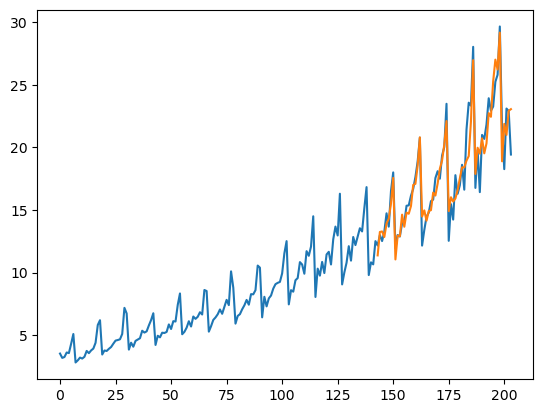

In [31]:
#plot actual value and predicted value
plt.plot(df[['Value','Forecast']])
plt.show()

In [32]:
#suppose apply ARIMA model in this dataset
from statsmodels.tsa.arima_model import ARIMA

In [33]:
#Create object of ARIMA Class and passing the value of some parameters
model=ARIMA(df["Value"],order=(2,1,1)) #(p,d,q) 

NotImplementedError: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been removed in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and statsmodels.tsa.SARIMAX.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained. It also offers alternative specialized
parameter estimators.
